# STEP01 Create Training Corpus Tutorial

This pipeline turns input text or text collections (See Figure 1) into a form that can be
used to train BERT models using the next pipelines in this project. The result of this
pipeline is a `.tsv` file with one column called `text`. Each row in that file
contains a document or consecutive sentences. The sentences are separated by `\n`.
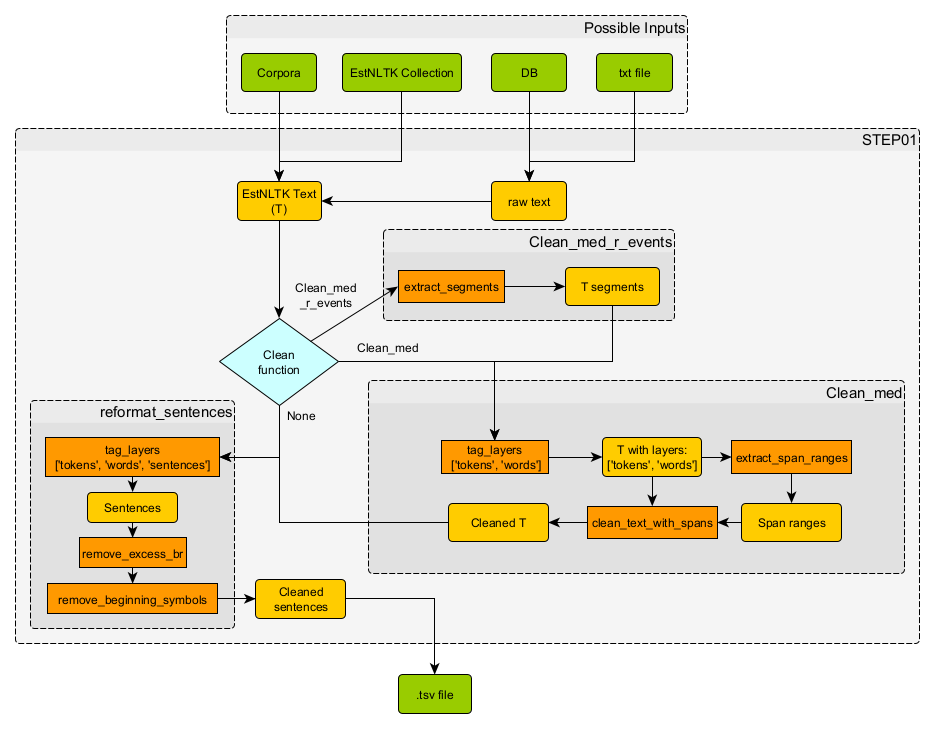

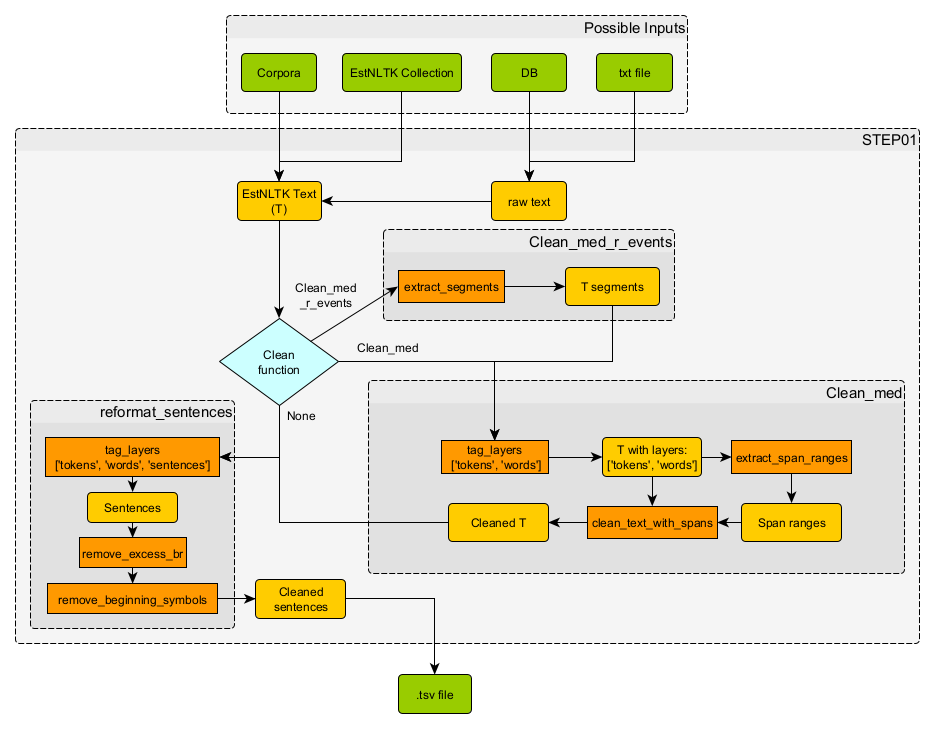

In [1]:
# IDEA image rendering above, in markdown in a format like
#   ![step01.png](attachment:step01.png)
# did not work, coded rendering seems to work.
# Tip from https://youtrack.jetbrains.com/issue/PY-29177 - Notebook can't display local images
from IPython.display import Image
Image(filename='images/step01.png')

**Figure 1.** The inner workings of the text preparation pipeline. The Clean function is an optional function, that cleans the EstNLTK Text objects (can be 1 or a list), which are extracted from the possible inputs. This is useful if you'd like to modify the texts. Text objects are immutable, thus the clean function creates a new Text object after modifying the initial string. After the Clean function, the sentences are extracted. If no clean function is provided, then the sentences are extracted from the initial Text objects.

## ESTNLTK Corpus processing

These pipelines do not clean/replace tokens in texts unless specified. Here is a basic example:

In [2]:
import csv
from estnltk.corpus_processing.parse_koondkorpus import parse_tei_corpora
from estnltk import Text

# just a helper function to display text in a file
def show_first_n(n, path):
    with open(path, newline='', encoding='utf-8') as file:
        tsv_reader = csv.reader(file, delimiter="\t")
        next(tsv_reader)
        for i, row in enumerate(tsv_reader):
            if i == n:
                break
            print(row)

In [3]:
from IPython.core.display import display
from pipelines.step01_text_processing import corpus


corpus_path = "data/Horisont/Hori/horisont"
result_path = "data/corp_res_clean.tsv"

# showing the first entry in the corpus
for text_obj in parse_tei_corpora(corpus_path, target=['artikkel']):
    display(text_obj)
    break

# processing and showing the first entry
corpus.clean_and_extract(corpus_path, result_path)
show_first_n(1, result_path)
        

Text(text='Veebruarikuus sai ühtäkki meediastaariks sümpaatne valgenäoline utt Dolly .\nTa vaatas meile vastu pea kõikide tähtsamate väljaannete lehekülgedelt ning temaga seostati pöördelisi , lausa meie tsivilisatsiooni alustugesid kõigutavaid tulevikuväljavaateid .\nPöördusin Helsingi ülikooli Biotehnoloogia Instituudi direktori akadeemik  Mart Saarma  poole , et kuulda , mida kloonitud lamba sünd tähendab teadusele ja meile kõigile .\n\nEelkõige on tegu äärmiselt olulise teadussaavutusega , mille sisu mõistmisele aitab kaasa üks väike kõrvalepõige ajalukku .\nJuba 1975. aastal tegi inglane  John Gurdon  kloonimiskatseid , kuid mitte imetajate , vaid konnadega .\nTa võttis kannuskonna keharaku tuuma ja siirdas selle konna munarakku .\nNagu teame , on konna munarakud , ( konnakudu ) väga suured .\nParaku ei õnnestunud aga Gurdonil täiskasvanud konna saada , munarakk arenes vaid kulleseni .\n1981. aastal avaldas sveitsi teadlane  Karl Ilmensee  koos ühe ameerika kolleegiga artikli väitega , et tal on õnnestanud kloonida hiir .\nSee oli tõeline sokk .\nKümned ja kümned laborid asusid Ilmensee katseid kordama , ( muide , nõnda kontrollibki teadus iseennast ! ) , see ei õnnestunud aga kellelgi .\nSegadus kasvas , ning lõpuks väitsid sveitslase kaastöötajad , et nad pole näinud teda vastavaid katseid tegemas .\nIlmensee teatas , et tegi neid vabal ajal , puhkepäevadel .\nLoomulikult kasvas skeptitsism veelgi ja peatselt tunnistati artikkel võltsinguks .\nIlmensee aga kaotas oma töökoha ja maine .\n\nWilmut ja Roslini Instituut  - >')

['Veebruarikuus sai ühtäkki meediastaariks sümpaatne valgenäoline utt Dolly .\nTa vaatas meile vastu pea kõikide tähtsamate väljaannete lehekülgedelt ning temaga seostati pöördelisi , lausa meie tsivilisatsiooni alustugesid kõigutavaid tulevikuväljavaateid .\nPöördusin Helsingi ülikooli Biotehnoloogia Instituudi direktori akadeemik Mart Saarma poole , et kuulda , mida kloonitud lamba sünd tähendab teadusele ja meile kõigile .\nEelkõige on tegu äärmiselt olulise teadussaavutusega , mille sisu mõistmisele aitab kaasa üks väike kõrvalepõige ajalukku .\nJuba 1975. aastal tegi inglane John Gurdon kloonimiskatseid , kuid mitte imetajate , vaid konnadega .\nTa võttis kannuskonna keharaku tuuma ja siirdas selle konna munarakku .\nNagu teame , on konna munarakud , ( konnakudu ) väga suured .\nParaku ei õnnestunud aga Gurdonil täiskasvanud konna saada , munarakk arenes vaid kulleseni .\n1981. aastal avaldas sveitsi teadlane Karl Ilmensee koos ühe ameerika kolleegiga artikli väitega , et tal on õ

### ESTNLTK Corpus processing + clean

You have to specify the *clean* argument to clean or further process these texts. If specified, this argument must be a function that takes 1 argument (an EstNLTK Text object) and also returns an EstNLTK Text object or a list of EstNLTK Text objects.

In [4]:
# lets make a simple clean function that removes every other token.
def simple_clean(in_text_obj):
    in_text_obj.tag_layer(['tokens'])
    res = []
    for i, token in enumerate(in_text_obj.tokens):
        if i % 2 == 0:
            res.append(token.text)
    return Text(" ".join(res))
    
# testing
simple_clean(Text("Täna on äärmiselt kena ilm."))

text
Täna äärmiselt ilm


In [5]:
# processing and showing the first entry
corpus.clean_and_extract(corpus_path, result_path, clean=simple_clean)
show_first_n(1, result_path)

['Veebruarikuus ühtäkki sümpaatne utt .\nvaatas vastu kõikide väljaannete ning seostati , meie alustugesid tulevikuväljavaateid Pöördusin ülikooli Instituudi akadeemik Saarma , kuulda mida lamba tähendab ja kõigile Eelkõige tegu olulise , sisu aitab üks kõrvalepõige .\n1975 aastal inglane Gurdon , mitte , konnadega Ta kannuskonna tuuma siirdas konna .\nteame on munarakud ( ) suured Paraku õnnestunud Gurdonil konna , arenes kulleseni 1981 aastal sveitsi Karl koos ameerika artikli , tal õnnestanud hiir See tõeline .\nja laborid Ilmensee kordama ( , kontrollibki iseennast ) see õnnestunud kellelgi Segadus , lõpuks sveitslase , nad näinud vastavaid tegemas Ilmensee , tegi vabal , .\nkasvas veelgi peatselt artikkel .\naga oma ja .\nja Instituut >']


### Pre-made cleaning functions

There are two cleaning functions already made in this project. Both are meant for cleaning clinical notes. These are called:

 * **clean_med**
    * removes tables/lists
    * replaces anonymised tags with "ta"/"tegema" (in the correct form) `<ADJ>`/`<NAME>`/`<ADV>`/`<INJ>`
    * replaces dates with `<DATE>`
    * replaces integers with `<INT>`
    * replaces floats with `<FLOAT>`
    * replaces `\n` with `<br>` to escape new lines.
 * **clean_med_events** - does the same as **clean_med**, but also
    * removes the event headers and
    * splits the clinical note at event header locations into individual tokens.
    
#### NOTE: don't forget to add `<ADJ>`,`<NAME>`,`<ADV>`,`<INJ>`,`<DATE>`,`<INT>`,`<FLOAT>``<br>`

In [6]:
# Another built-in cleaning method: clean_med_events()
from pipelines.step01_text_processing.textprocessing.text_cleaning import clean_med

corpus.clean_and_extract(corpus_path, result_path, clean=clean_med)
show_first_n(1, result_path)

['Veebruarikuus sai ühtäkki meediastaariks sümpaatne valgenäoline utt Dolly .\nTa vaatas meile vastu pea kõikide tähtsamate väljaannete lehekülgedelt ning temaga seostati pöördelisi , lausa meie tsivilisatsiooni alustugesid kõigutavaid tulevikuväljavaateid .\nPöördusin Helsingi ülikooli Biotehnoloogia Instituudi direktori akadeemik Mart Saarma poole , et kuulda , mida kloonitud lamba sünd tähendab teadusele ja meile kõigile .\nEelkõige on tegu äärmiselt olulise teadussaavutusega , mille sisu mõistmisele aitab kaasa üks väike kõrvalepõige ajalukku .\nJuba <DATE> .\naastal tegi inglane John Gurdon kloonimiskatseid , kuid mitte imetajate , vaid konnadega .\nTa võttis kannuskonna keharaku tuuma ja siirdas selle konna munarakku .\nNagu teame , on konna munarakud , ( konnakudu ) väga suured .\nParaku ei õnnestunud aga Gurdonil täiskasvanud konna saada , munarakk arenes vaid kulleseni .\n<DATE> .\naastal avaldas sveitsi teadlane Karl Ilmensee koos ühe ameerika kolleegiga artikli väitega , et 

## Other pipelines in step01

Other pipelines behave similarly, thus won't be shown in this tutorial,
but they are brought out here:

 * **db.clean_and_extract** - Takes texts (`raw_text` column) from source `<schema>.<table>`,
   cleans then separates sentences and puts the result into target `<schema>.<table>` (`text` column)
        param: db_config: parameters used to make a connection to the database
                for example:
                "postgresql://{username}:{password}@{host}:{port}/{database}".format(
                username="username",
                password="pass",
                host="ip",
                port=5432,
                database="dbname")
        :param source_schema: The schema, that contains the source_table
        :param source_table: The table that contains the texts which will be
                             processed ('raw_text' column)
        :param target_schema: The schema, that contains the target_table
        :param target_table: The name of the resulting table. Must have column: 'text'
        :param clean: Function, that cleans takes an EstNLTK object as an argument
                      and cleans it and returns it
            
 * **tsv.clean_and_extract** - A pipeline that converts and cleans text from a
   source TSV file into usable form for training a BERT model.
        :param in_tsv_path: path to the source .tsv file
        :param out_path: path to the output .txt file
        :param text_col_i: index of the column (zero-based), that contains text
           to be cleaned and extracted
        :param max_processes: (default = 1) The number of processes you want to
           create and use.
           Note that you don't need as many if you use a cheap clean
           function (if at all) than an expensive one.
        :param clean: (default=None) Function, that cleans takes an EstNLTK object as an
           argument and cleans it. There are two pre-made cleaning functions in this
           package {clean_med, clean_med_r_events}
        :param tsv_delimiter: (default = '')
        :param tsv_encoding: (default = utf-8)
        :param tsv_newline: (default = \t)
        
 * **corpus.clean_and_extract** - Cleans (optional) and extract sentences from a corpus.
        :param corp_path: Path to the corpus
        :param out_file_path: output .txt file
        :param max_processes: (default = 1) The number of processes you want to create
           and use. Note that you don't need as many if you use a cheap clean
           function (if at all) than an expensive one.
        :param clean: (default=None) Function, that cleans takes an EstNLTK object
           as an argument and cleans it. There are two pre-made cleaning functions
           in this package {clean_med, clean_med_events}.